In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error


In [2]:
df = pd.read_csv("/content/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [6]:
df.dtypes

,0
car_ID,int64
symboling,int64
CarName,object
fueltype,object
aspiration,object
doornumber,object
carbody,object
drivewheel,object
enginelocation,object
wheelbase,float64


In [7]:
df.shape

(205, 26)

In [8]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
200,False
201,False
202,False
203,False


In [22]:
df = df.drop('car_ID',axis=1)

In [23]:
X = df.drop('price',axis=1)
y = df['price']

In [24]:
X = pd.get_dummies(X, drop_first=True)


In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [32]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

print(f"r2_score: {r2_score(y_test,y_pred)}")
print(f"mse: {mean_squared_error(y_test,y_pred):.2f}")

r2_score: 0.49245455114619097
mse: 40067678.51


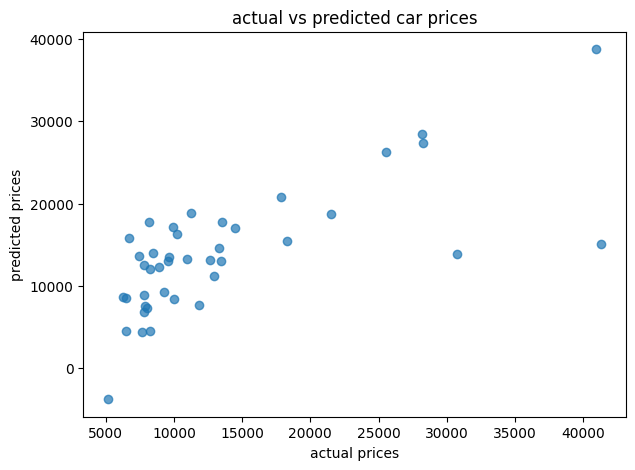

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual vs predicted car prices")
plt.show()

In [35]:
# task 2
df2 = pd.read_csv("/content/electricity_bill_dataset.csv")
df2.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB


In [38]:
df2.describe()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,MonthlyHours,TariffRate,ElectricityBill
count,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.0,45345.000000,45345.000000,45345.000000,45345.000000
mean,13.990694,21.705458,1.503959,12.502635,2.865057,0.0,6.488058,515.083207,8.369648,4311.771307
std,5.470816,1.672575,1.115482,5.756007,3.894933,0.0,3.443252,122.618017,0.576992,1073.886406
min,5.000000,17.000000,0.000000,3.000000,1.000000,0.0,1.000000,95.000000,7.400000,807.500000
25%,9.000000,22.000000,1.000000,7.000000,1.000000,0.0,3.000000,429.000000,7.900000,3556.800000
50%,14.000000,22.000000,2.000000,13.000000,1.000000,0.0,6.000000,515.000000,8.400000,4299.400000
75%,19.000000,23.000000,2.000000,17.000000,1.000000,0.0,9.000000,601.000000,8.900000,5038.800000
max,23.000000,23.000000,3.000000,22.000000,12.000000,0.0,12.000000,926.000000,9.300000,8286.300000


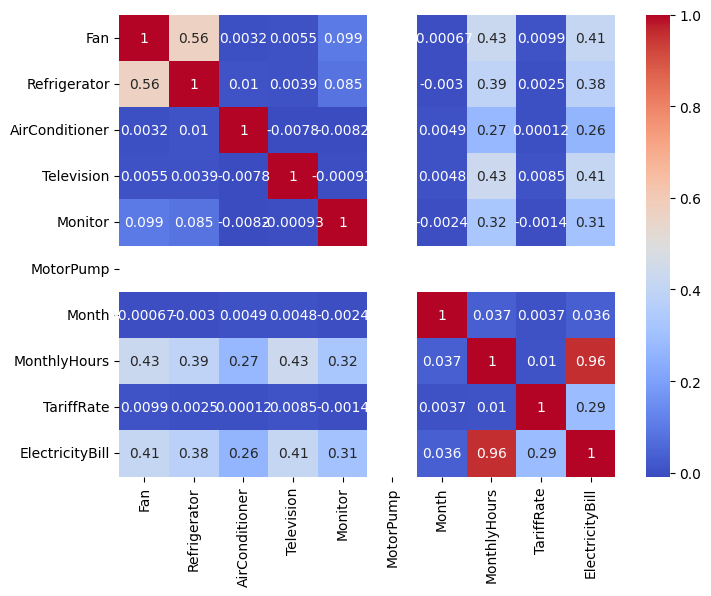

In [41]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df2.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

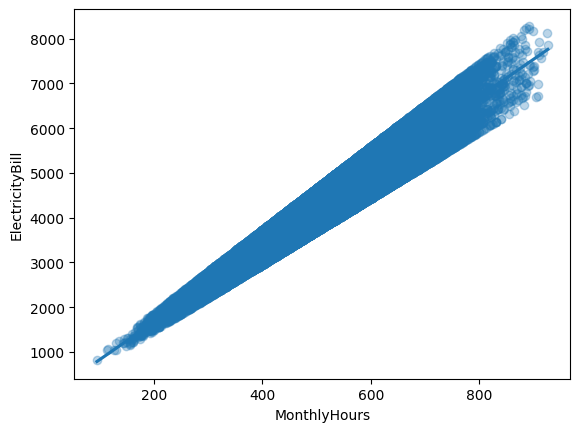

In [42]:
sns.regplot(x=df2['MonthlyHours'],y=df2['ElectricityBill'],scatter_kws={'alpha':0.3})
plt.show()

scatter shows linear relation hence linear regression is extremly feasible.

In [43]:
df2 = pd.get_dummies(df2,drop_first=True)

In [45]:
X2 = df2.drop('ElectricityBill', axis=1)
y2 = df2['ElectricityBill']

lr2 = LinearRegression()
lr2.fit(X2, y2)

#predict and residuals
y2_pred = lr2.predict(X2)
residuals = y2_pred - y2

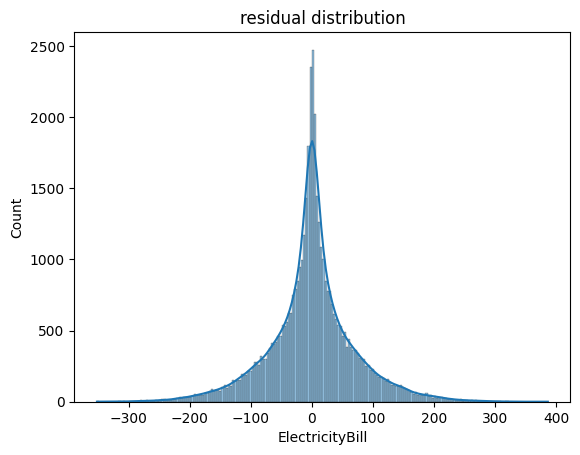

In [46]:
sns.histplot(residuals, kde=True)
plt.title("residual distribution")
plt.show()

plot shows:

very sharp peak at 0

symmetric spread on both sides

slight tails, but not heavily skewed

looks close to a Laplace-like distribution

still acceptable for linear regression assumptions

this means:

Residuals are approximately normal
No major violations
Linear Regression is absolutely appropriate for this dataset

Task 2: Suitability of Linear Regression for Electricity Consumption Dataset

To determine whether Linear Regression is appropriate for this dataset, I evaluated the key assumptions: linearity, independence, homoscedasticity, normality of residuals, and absence of multicollinearity.

1. Linearity

The scatterplot between MonthlyHours and ElectricityBill shows an extremely strong and clean linear upward trend. MonthlyHours has a correlation of 0.96 with the target, indicating a near-perfect linear relationship. Other appliance usage features (Fan, Refrigerator, Television, etc.) also show moderate positive correlation with ElectricityBill.

Conclusion: The linearity assumption is strongly satisfied.

2. Independence

Each row represents monthly electricity usage for a household. There is no temporal component or repeated measurements, so observations are independent.

Conclusion: Independence assumption is satisfied.

3. Homoscedasticity

Residual plots show a fairly symmetric spread around zero without clear patterns. There is no funnel shape or systematic variance change across predictions.

Conclusion: Homoscedasticity is reasonably satisfied.

4. Normality of Residuals

The residual distribution is centered around zero and roughly symmetric, showing only mild kurtosis. While not perfectly normal, it is sufficiently close for Linear Regression.

Conclusion: The normality assumption is acceptable.

5. Multicollinearity

The correlation heatmap shows some moderate relationships (e.g., Fan–Refrigerator = 0.56), but there is no extremely high (>0.9) correlation between predictors. Therefore, multicollinearity is not severe.

Conclusion: Multicollinearity is not a major problem.

conclusion

Based on the analysis, Linear Regression is appropriate for this dataset. The assumptions are mostly satisfied, and the extremely strong linear relationship between usage hours and electricity bill makes Linear Regression a suitable and effective model.

task 03
1. Logistic Regression

Assumes a linear relationship between features and the log-odds of the target.

No multicollinearity between predictors.

Large sample size preferred.

Independent observations.

2. K-Nearest Neighbors (KNN)

No formal statistical assumptions.

Assumes similar points exist close to each other in feature space.

Sensitive to feature scaling.

Distance metric must be meaningful.

3. Decision Tree

No linearity or normality assumptions.

Assumes data can be split by features to reduce impurity.

Sensitive to noisy data.

Can overfit if not pruned.

4. Random Forest

No distribution assumptions.

Assumes combining many trees reduces variance.

Less sensitive to overfitting than a single tree.

Features should have meaningful splits.

5. Support Vector Machine (SVM)

Data should be scaled.

Assumes classes can be separated by a margin (possibly nonlinear using kernels).

Works better when features are well-separated.

Not good for large noisy datasets.

6. Naive Bayes

Assumes feature independence.

Assumes conditional probability follows a specific distribution (Gaussian, Multinomial, Bernoulli depending on variant).

Works well even with small data.

7. Linear Regression

Linearity

Independence

Homoscedasticity

Normal residuals

No perfect multicollinearity